# Graphing Datetime Objects

## Introduction

**While taking the in-class portion of our first midterm, I made things a little harder for myself. Rather than simply converting our variables representing time to minutes as an integer, I converted these variables to both datetime.time & datetime.timedelta types. This made things such as graphing not so straightforward. However, through this process I learned a bit about the different datetime objects and some of their capabilities and limitations. The biggest obstacle I faced was trying to graph timedelta variables. In this brief tutorial I intend to answer the following: What are easy ways to graph datetime.time and/or datetime.timedelta variables? We will be looking at scatter plots and regression plots. In the process,
we will see different cases of conversion to/from datetime objects.**

## The Data

*Read in some necessary libraries*

In [1]:
import numpy as np
import pandas as pd

*The Rex Lee Run is a 5K / 10K run held annually at BYU. The 'new_rlr2019.csv' holds the 2019 race results and has removed any outliers.*

In [2]:
rlr = pd.read_csv('new_rlr2019.csv')

In [3]:
rlr.head(n=5)

,bib,name,race,division,city,state,chip_time,gun_time,pace,overall_place,gender_place,division_place
0,1,Chris Adamson,5k,M 20-29,Orem,UT,00:37:58,00:39:50,12:15/M,467 of 781,243 of 346,123 of 160
1,2,Jamilyn Adamson,10k,F 20-29,Orem,UT,1:01:54,1:02:01,9:59/M,181 of 244,94 of 141,58 of 83
2,3,Stephen Anthony,5k,M 50-59,Heber City,UT,00:39:10,00:39:31,12:38/M,493 of 781,251 of 346,17 of 32
3,7,Cory Grand,5k,M 40-49,Lehi,UT,00:26:33,00:26:51,8:34/M,127 of 781,104 of 346,10 of 33
4,8,Andi Groen,5k,F 50-59,Bountiful,UT,00:41:51,00:43:12,13:30/M,549 of 781,271 of 435,15 of 41


## Tutorial

In [4]:
type(rlr.chip_time[0])

str

**Convert strings to datetime.time variables.**

In [5]:
import datetime
from datetime import time

In [6]:
chip = [datetime.time(*map(int, x.split(':'))) for x in rlr.chip_time]
gun = [datetime.time(*map(int, x.split(':'))) for x in rlr.gun_time]

In [7]:
rlr.chip_time = chip
rlr.gun_time = gun

**Create a variable that contains the difference between gun time and chip time for each runner (note that gun time should always be longer than chip time).**

The following code produces an error.

In [8]:
# rlr.gun_time[0]-rlr.chip_time[0]

*Notice we cannot perform straightforward subtraction between two datetime.time variables. Since the variable is a difference/change in time, we will use datetime.timedelta.*

In [9]:
from datetime import datetime, date
diff = list()
for i in range(len(chip)):
    d = datetime.combine(date.min, gun[i]) - datetime.combine(date.min, chip[i])
    diff.append(d)

In [10]:
rlr['diff_time'] = diff

**Plot the variable you just created.**

The following command produces an error.

In [11]:
# plt.scatter(range(len(rlr)), rlr.diff_time)

*Observe how we cannot plot a datetime.timedelta variable. However, we can plot datetime.time types. Let's convert diff_time to a datetime.time type for the sake of plotting.*

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

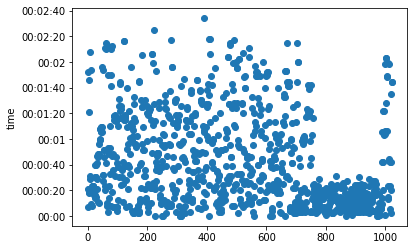

In [13]:
import datetime
d = [(datetime.datetime.min + x).time() for x in rlr.diff_time]
plt.scatter(range(len(rlr)), d)

**Make a scatterplot with the diff_time on the x-axis and pace on the y-axis. Include the regression line between these two variables.**

In [14]:
import seaborn as sns 

In [15]:
rlr.pace

0       12:15/M
1        9:59/M
2       12:38/M
3        8:34/M
4       13:30/M
         ...   
1018    15:27/M
1019    10:29/M
1020    11:17/M
1021    12:10/M
1022    12:10/M
Name: pace, Length: 1023, dtype: object

*First, convert pace to a datetime.time variable*

In [16]:
p = ["00:" + x.split('/')[0] for x in rlr.pace]
rlr['pace'] = [datetime.time(*map(int, x.split(':'))) for x in p]

The following code produces an error.

In [17]:
# sns.lmplot(x='diff_time',y='pace', data=rlr)

*As expected, we cannot plot between raw datetime variables. Let's see if the regression plot works if we change diff_time to a datetime.time variable. In other words, let's see if lmplot will work with two datetime.time variables rather than one datetime.time & one datetime.timedelta*

In [18]:
rlr['diff_time1'] = d

The following code produces an error.

In [19]:
# sns.lmplot(x='diff_time1',y='pace', data=rlr3)

*Clearly, in order to plot this graph we will need to convert both diff_time1 & pace from datetime.time to integers and represent time as minutes.*

In [20]:
import datetime
minutes = [x.hour * 60 + x.minute + x.second/60 for x in rlr.diff_time1]
rlr['diff_time_m'] = minutes

minutes = [x.hour * 60 + x.minute + x.second/60 for x in rlr.pace]
rlr['pace_time_m'] = minutes

Text(0.29999999999999716, 0.5, 'Pace Per Mile (minutes)')

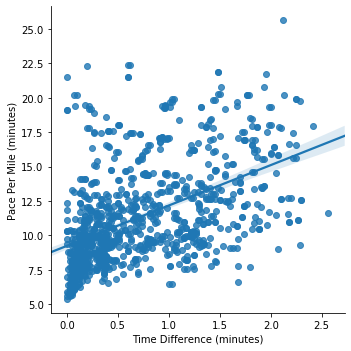

In [21]:
sns.lmplot(x='diff_time_m',y='pace_time_m', data=rlr)
plt.xlabel("Time Difference (minutes)")
plt.ylabel("Pace Per Mile (minutes)") 

*If one still wanted to display the datetime.time values, we can simply reset the tick labels*

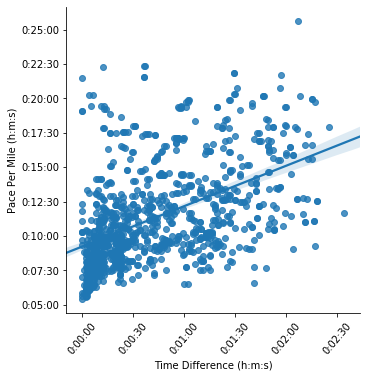

In [23]:
from datetime import datetime, timedelta

sns.lmplot(x='diff_time_m',y='pace_time_m', data=rlr)
plt.xlabel("Time Difference (h:m:s)")
plt.ylabel("Pace Per Mile (h:m:s)") 
ax = plt.gca()

xticks = ax.get_xticks()
yticks = ax.get_yticks()

# convert to datetime.timedelta
xticks_minutes = [timedelta(minutes=x) for x in xticks]
yticks_minutes = [timedelta(minutes=x) for x in yticks]

ax.set_xticklabels(xticks_minutes,rotation=50)
ax.set_yticklabels(yticks_minutes)
plt.show()

## Conclusion

**In conclusion, we see that graphing with dateime objects involves many conversions--at least when graphing from common libraries like matplotlib.pyplot & seaborn--since we cannot directly input these type of objects into plot functions or even perform basic arithmetic like subtraction on some of them. Luckily, the different attributes of datetime objects make conversions quite simple and straightforward. As such, I do think it's worth using datetime objects even with these limitations, mainly because they format time in an easily readable way. Perhaps there will be a new library created that allows coders to plot their raw datetime objects... I hope you found this tutorial informative and helpful for your coding endeavors that!**